In [18]:
# Import library
# http://ufldl.stanford.edu/wiki/index.php/Independent_Component_Analysis
# http://ufldl.stanford.edu/tutorial/unsupervised/ICA/
# http://ufldl.stanford.edu/tutorial/unsupervised/ExerciseRICA/
import tensorflow as tf
import numpy as np
import sys, os,cv2
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom
from sklearn.utils import shuffle
import matplotlib.animation as animation
import seaborn as sns
import scipy.linalg as LA

plt.style.use('seaborn-white')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
np.random.seed(6278)
tf.set_random_seed(6728)
ia.seed(6278)

In [6]:
# Read the Data and Shuffle it 
from sklearn.datasets import fetch_olivetti_faces
from skimage.transform import rescale, resize
dataset = fetch_olivetti_faces(shuffle=True)
train_data  = dataset.data.astype(np.float64)
print('---- Before Centering -------')
print(train_data.shape)
print(train_data.min(),train_data.max())
print(train_data.mean(),train_data.std())

shuffle_index = np.random.permutation(len(train_data))
train_data = train_data[shuffle_index]

---- Before Centering -------
(400, 4096)
0.0 1.0
0.5470424729887565 0.17251528436417765


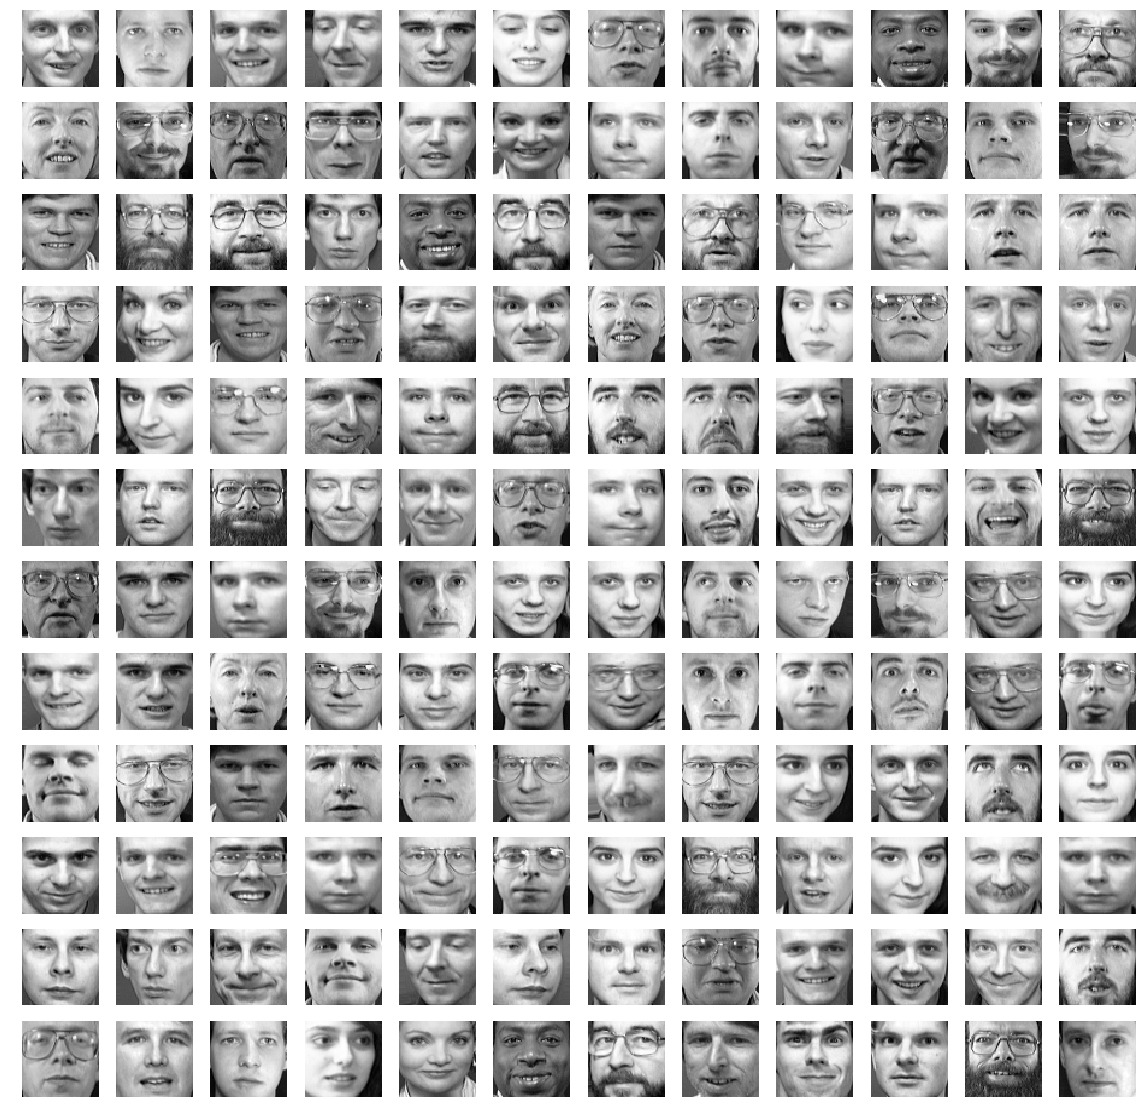

In [7]:
# view some of the data
fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_data[i-1].reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()

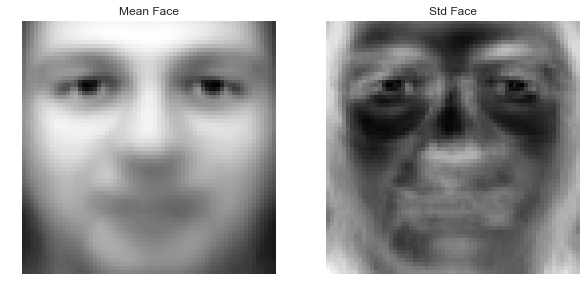

In [9]:
# center it per dimension
mean_face = train_data.mean(0); std_face = train_data.std(0)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(mean_face.reshape(64,64),cmap='gray')
plt.axis('off')
plt.title("Mean Face")

plt.subplot(122)
plt.imshow(std_face.reshape(64,64),cmap='gray')
plt.axis('off')
plt.title("Std Face")

plt.show()

---- Before Centering -------
(400, 4096)
-0.640640495447442 0.6372004163265228
-2.8796409701214996e-18 0.13880795800960016


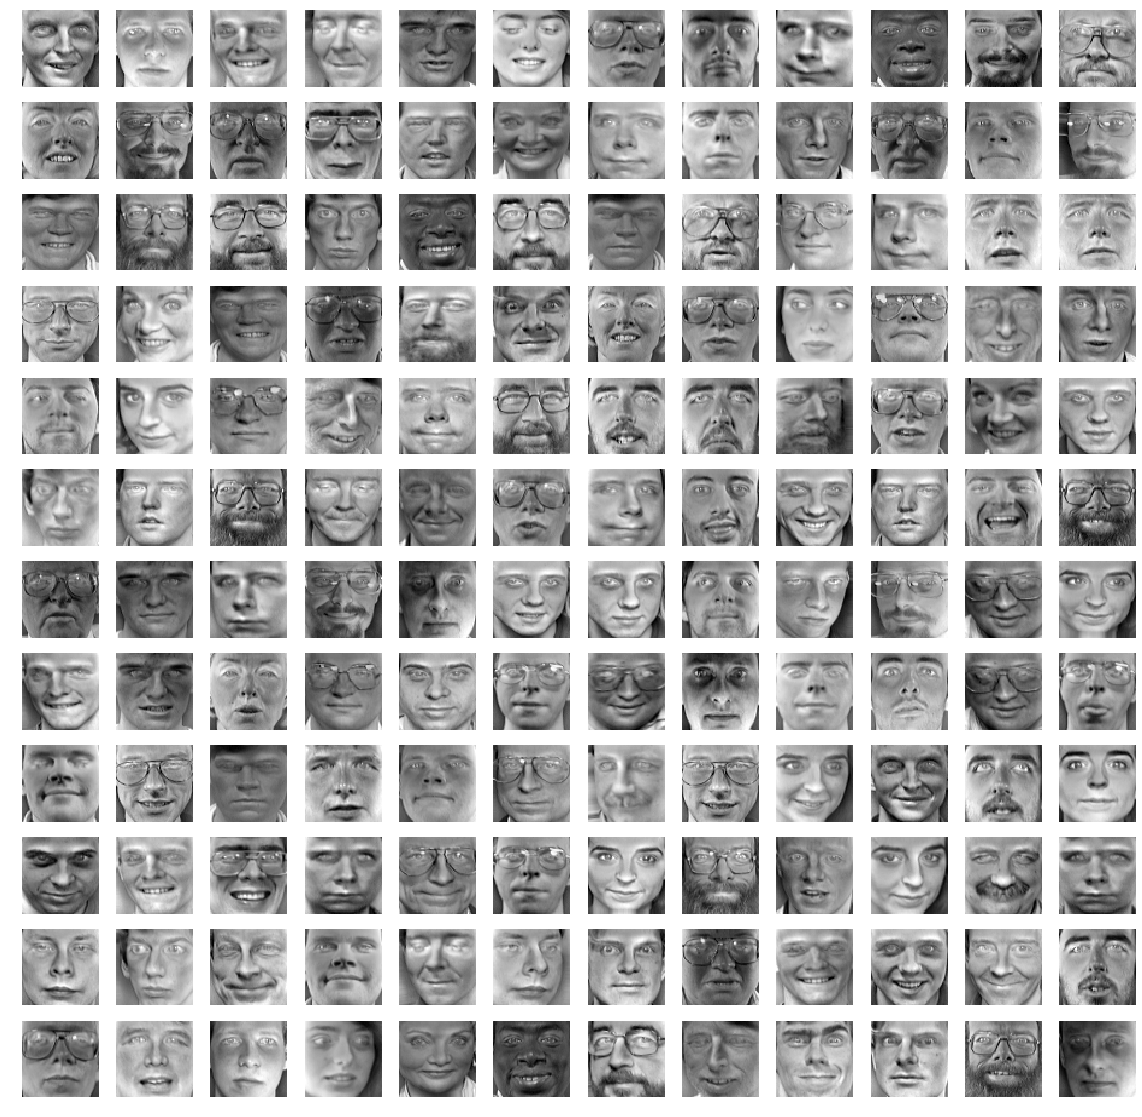

In [10]:
# center the face per dimesion and view it
centered = train_data - mean_face
print('---- Before Centering -------')
print(centered.shape)
print(centered.min(),centered.max())
print(centered.mean(),centered.std())
fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(centered[i-1].reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()

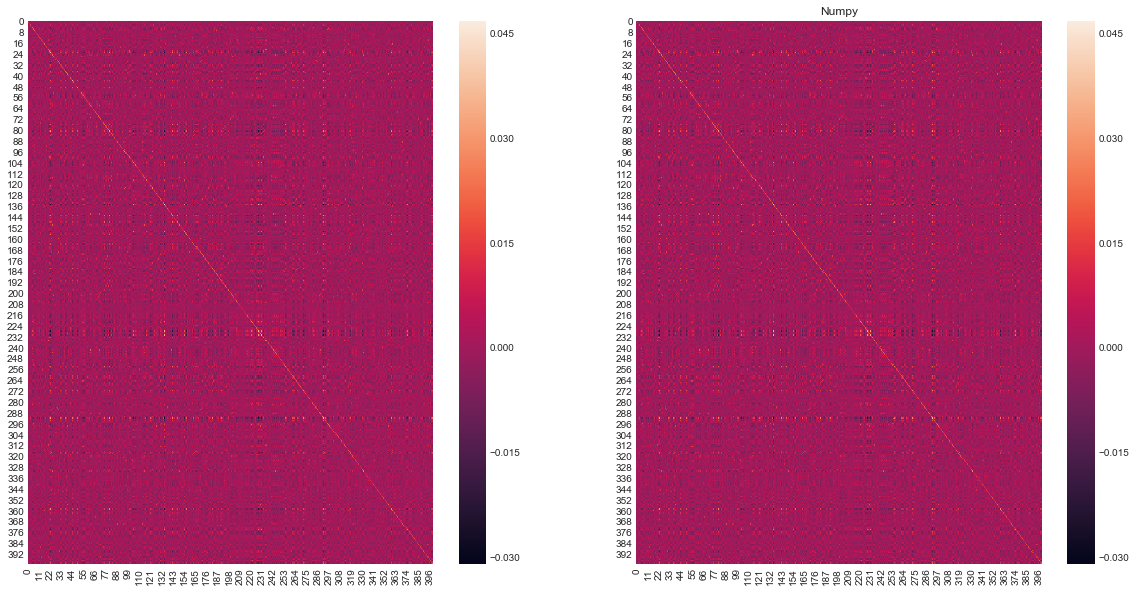

In [17]:
# calculate the co-variance 
centered_both = centered - centered.mean(1)[:,np.newaxis]
centered_both_cov = (centered_both @ centered_both.T)/centered_both.shape[1]
plt.figure(figsize=(20,10))
plt.title('Manual')
plt.subplot(121)
sns.heatmap(centered_both_cov)
plt.subplot(122)
plt.title('Numpy')
sns.heatmap(np.cov(centered,rowvar=True))
plt.show()

In [19]:
# Eigen value decomposition
evalue,evector = LA.eigh(centered_both_cov)

In [21]:
# sort the eigen values 
print('First 5 Values before sorting: ',evalue[:5])
print('Final 5 Values before sorting: ',evalue[-5:])
print('First 5 Vector Mean before sorting: ',evector[:,:5].mean())
print('Final 5 Vector Mean before sorting: ',evector[:,-5:].mean())
idx = np.argsort(evalue)[::-1]
print('-------------------------')
evalue_sort = evalue[idx]; evector_sort = evector[:,idx]
print('First 5 Values after sorting: ',evalue_sort[:5])
print('Final 5 Values after sorting: ',evalue_sort[-5:])
print('First 5 Vector Mean after sorting: ',evector_sort[:,:5].mean())
print('Final 5 Vector Mean after sorting: ',evector_sort[:,-5:].mean())

First 5 Values before sorting:  [1.83070021e-18 1.26254599e-04 1.54294092e-04 1.64793093e-04
 1.67680294e-04]
Final 5 Values before sorting:  [0.24658138 0.33915934 0.43051848 0.61670755 1.1001891 ]
First 5 Vector Mean before sorting:  0.010000000000000255
Final 5 Vector Mean before sorting:  8.881784197001253e-19
-------------------------
First 5 Values after sorting:  [1.1001891  0.61670755 0.43051848 0.33915934 0.24658138]
Final 5 Values after sorting:  [1.67680294e-04 1.64793093e-04 1.54294092e-04 1.26254599e-04
 1.83070021e-18]
First 5 Vector Mean after sorting:  3.191891195797325e-19
Final 5 Vector Mean after sorting:  0.010000000000000255


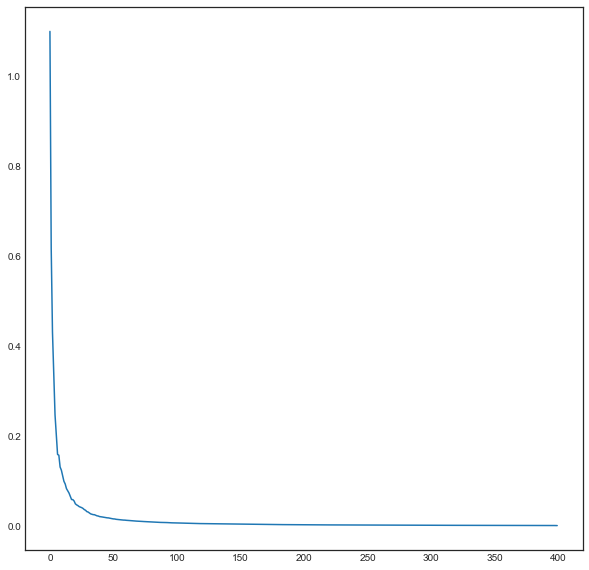

Original Eig Vector:  (400, 400)
Selected Eig Vector:  (400, 50)


In [25]:
# plot the variance of e value select 50 eigen vectors
plt.figure(figsize=(10,10))
plt.plot(evalue_sort)
plt.show()
evector_sort_small = evector_sort[:,:50]
print('Original Eig Vector: ',evector_sort.shape)
print('Selected Eig Vector: ',evector_sort_small.shape)

Reduced data Shape : (50, 4096)


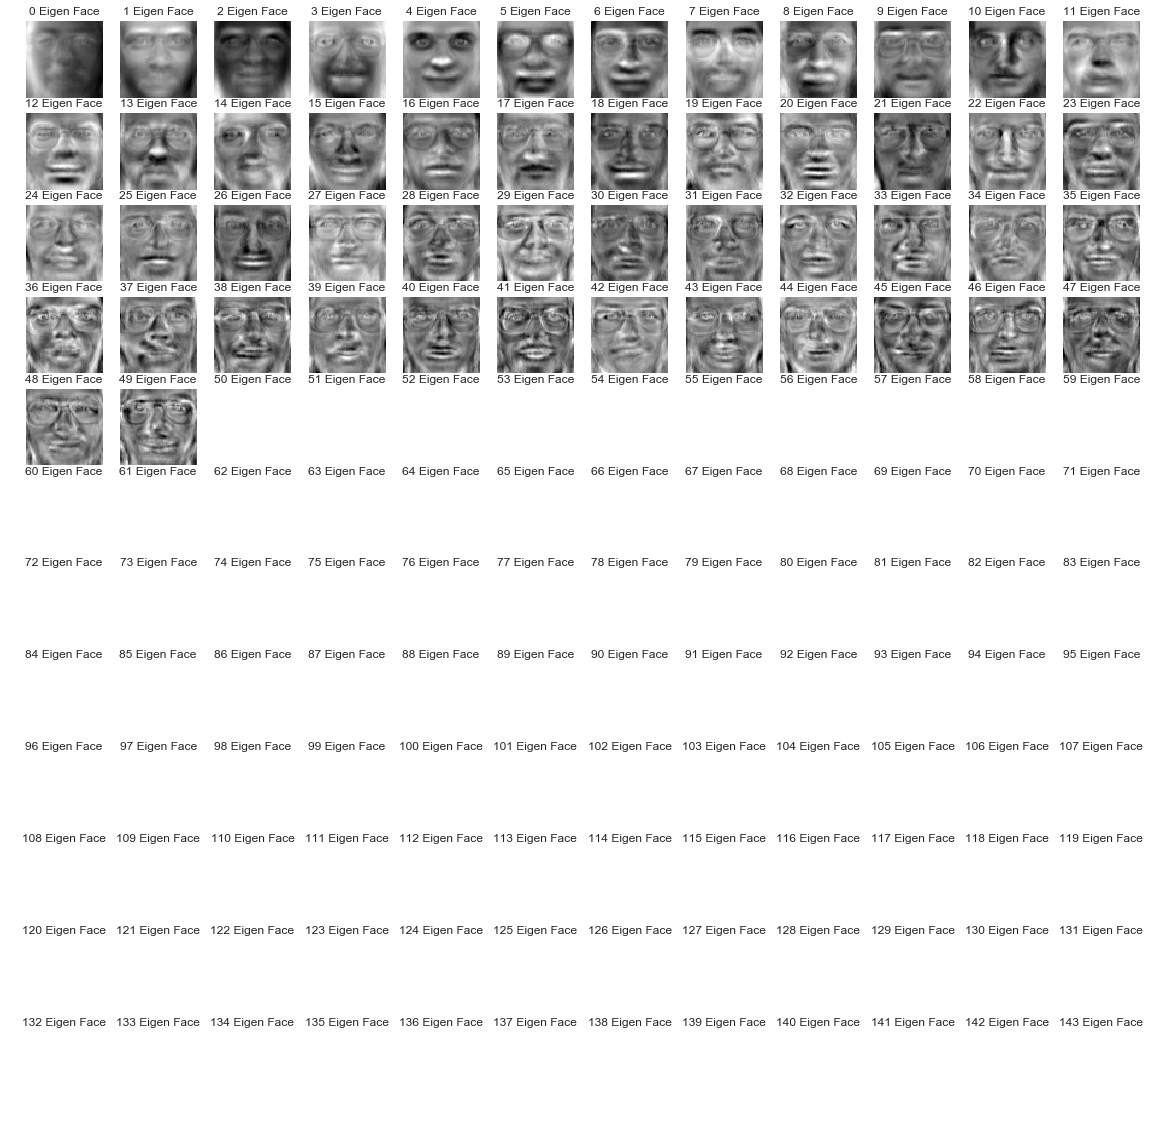

In [31]:
# project the normalized centered data to sub space
sub_centered = evector_sort_small.T @ centered_both
print('Reduced data Shape :',sub_centered.shape)
fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    try:
        plt.imshow(sub_centered[i-1].reshape(64,64),cmap='gray')
        plt.title(str(i-1) + ' Eigen Face')
    except:
        pass
plt.show()

In [ ]:
# Reconstruce form the small data